In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Create the TwitterClient datatype

In [2]:
class TwitterClient(object):
    # generic Twitter class for sentiment analysis
    def __init__(self):
        '''
        Initialization method
        '''
        # keys and tokens from the twitter by Develop
        consumer_key="yFJMh1MGWp2jHuL6DNyGsSEtX"
        consumer_secret="IXr5AkulpL0i6YfQ5q404FvLyrnYVbQP2KyB4d5ToI16uUToXi"
        access_token="901924927133151232-2Lnr6SFDeSN3fjcwz4sLOywF0OM05De"
        access_token_secret="t19SO7Q4joHrEW2rY0gd62atBUsqKZrAalQorEBFf33cG"
        # attempt authentation
        try:
            self.auth=OAuthHandler(consumer_key, consumer_secret)
            self.auth.set_access_token(access_token,access_token_secret)
            self.api=tweepy.API(self.auth) 
        except:
            print ("Error:Authentation Failed")    
    def clean_tweet(self,tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    def get_tweet_sentiment(self,tweet):
        analysis=TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity>0:
            return 'positive'
        elif analysis.sentiment.polarity==0:
            return 'netural'
        else:
            return 'negative'
    def get_tweets(self,query,count=10):
        # create an empty list to store parsed tweets
        tweets=[]        
        try:
        # call api to fetch tweets
            fetched_tweets=self.api.search(q=query,count=count)
        # use for loop to parse tweets one by one
            for tweet in fetched_tweets:
                parsed_tweet={}
                parsed_tweet['text']=tweet.text
                parsed_tweet['sentiment']=self.get_tweet_sentiment(tweet.text)
                if tweet.retweet_count>0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
            return tweets
        except tweepy.TweepError as e:
            print("Error:"+str(e))

Calculate the percentage of positive and negative tweets

In [55]:
api=TwitterClient()
# call function to get tweets 
tweets=api.get_tweets(query="Artificial Intelligence",count=5000)
# create a list to restore the positive
ptweets=[tweet for tweet in tweets if tweet['sentiment']=='positive']
ntweets=[tweet for tweet in tweets if tweet['sentiment']=='negative']
ppercent=len(ptweets)/len(tweets)
npercent=len(ntweets)/len(tweets)
print ("The positive tweet percentage towards artifical intelligence is"+" "+str(round(ppercent,2)))
print ("The negative tweet percentage towards artifical intelligence is"+" "+str(round(npercent,2)))

The positive tweet percentage towards artifical intelligence is 0.12
The negative tweet percentage towards artifical intelligence is 0.81


Visulaize the count of tweets with three emotional valence

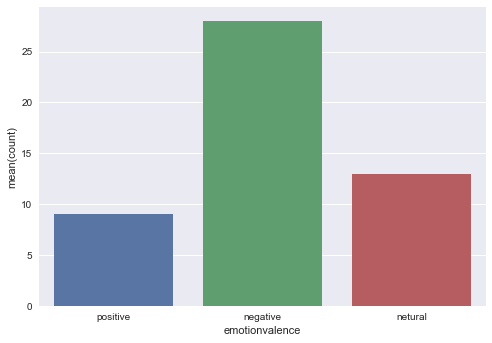

In [49]:
d = {'emotionvalence': ['positive', 'negative','netural'], 'count': [9, 28,13]}
df=pd.DataFrame(d)
ax = sns.barplot(x="emotionvalence", y="count", data=df)
plt.show()

Make extracts on positive tweets

In [59]:
for tweet in ptweets[:5]:
    print (tweet['text'])

RT @ipfconline1: How to create a good Artificial Intelligence?
👉Getting Started With Genetic #Algorithms
A Tutorial by @LouisnNicolle v/ @s…
RT @HOG911: Flitto’s language data helps machine translation systems get more accurate #artificial_intelligence https://t.co/QAMyLsezbv - g…
DESIGNED FOR EVERYONE'S NEED - WE HAVE OVER 200,000 USERS!  The Best Natural Language Analysis and Artificial Intel… https://t.co/NO9glzDXAj
Any success story is a story of innovations. Technologies transform the economic landscape. Big data has become the… https://t.co/z8msW9lk2I
An Inside Look at the First Nation With a Minister for #ArtificialIntelligence #AI #IA #machinelearning #BigData https://t.co/QHTlcQlZlW


Make extarcts on negative tweets

In [60]:
for tweet in ntweets[:5]:
    print (tweet['text'])

10 leaders on how HR can make the most of artificial intelligence on @personneltoday ft. @hirevue https://t.co/Q75H7BvdMv #AI
Artificial Intelligence (AI) Disrupts the Traditional Insurance Industry https://t.co/WZC5QuJjAk #chatbots
RT @mineifiwildout: shouts out all the black sheep ppl that kinda jus sit at the function pondering complex mathematical equations n whethe…
RT @jborkenhagen: Conversational interface design is the new black :-)  https://t.co/ngBVZaRQ9k
Banks are looking to use artificial intelligence in almost every part... https://t.co/9LCQ7tU9Ny #ai #ml #dl
